In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv("scraping.csv")
df

,Unnamed: 0,text
0,0,Timestamp :\n0:00 opening\n0:25 disclaimer \n1...
1,1,"Team speaker Eggel, sudah punya yang Eggel Fit..."
2,2,Wah kebetulan lagi nyari Speaker Bluetooth yan...
3,3,"Masih QCY Box 2 tetap di hati, gua punya speak..."
4,4,This is where local industries start rising. P...
...,...,...
1419,1419,nah
1420,1420,Tod bacod
1421,1421,"sori gw dislike, textnya mengganggu gambar"
1422,1422,Rinrei


In [2]:
def clean(a,b):
    df['text']= df['text'].str.replace(a,b)

df['text'] = df['text'].astype(str).str.lower()
df.text = df.text.str.replace('\d+', '')
clean('.','')
clean(',','')
clean('-','')
clean('/','')
clean(':','')
clean(':\n','')
clean("\n",'')
clean(":\n",'')
df

C:\Users\jhonm\AppData\Local\Temp\ipykernel_28896\4199718327.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace('\d+', '')
C:\Users\jhonm\AppData\Local\Temp\ipykernel_28896\4199718327.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text']= df['text'].str.replace(a,b)


,Unnamed: 0,text
0,0,timestamp opening disclaimer iklan kopi kapa...
1,1,team speaker eggel sudah punya yang eggel fit ...
2,2,wah kebetulan lagi nyari speaker bluetooth yan...
3,3,masih qcy box tetap di hati gua punya speaker...
4,4,this is where local industries start rising pr...
...,...,...
1419,1419,nah
1420,1420,tod bacod
1421,1421,sori gw dislike textnya mengganggu gambar
1422,1422,rinrei


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['text'].values.astype('U'))  ## Even astype(str) would work


In [4]:
#from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs

#from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#df = df['text']

# Instantiate the clustering model and visualizer
#model = KMeans()
#visualizer = KElbowVisualizer(model, k=(4,12))

#visualizer.fit(df)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure   

In [8]:
from sklearn.cluster import KMeans
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1423, n_init=1423)
model.fit(x)
labels=model.labels_
new_df=pd.DataFrame(list(zip(df['text'],labels)),columns=['title','cluster'])
print(new_df.sort_values(by=['cluster']))

                                                  title  cluster
1252                          sound yg lagi viral eh eh        0
1186                          buat yg nyari eh eh doang        0
1376                                    nyari "eh eh"?         0
1378                              cuma liat sound eh eh        0
1361                                        sound eh eh        0
...                                                 ...      ...
1341                                         jbl kw itu        5
504   jbl go  nya seperti barang kw  gue punya jbl g...        5
1243                      jbl kalo harganya  itu sih kw        5
1013                               jbl go nya kw ituuuu        5
1176                 kyknya jbl kw di official jbl xxxx        5

[1424 rows x 2 columns]


In [7]:
new_df.to_csv('kandedes2.csv')



Cluster: 0
Titles


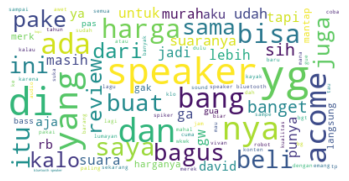

      cluster                                               wiki
0           0  timestamp  opening disclaimer  iklan kopi kapa...
2           0  wah kebetulan lagi nyari speaker bluetooth yan...
3           0  masih qcy box  tetap di hati gua punya speaker...
5           0  appreciate bangbener manfaat banget utk mmberi...
6           0  yg bagus di mata dapidspeaker oontz (  ) kspea...
...       ...                                                ...
1419        0                                                nah
1420        0                                          tod bacod
1421        0          sori gw dislike textnya mengganggu gambar
1422        0                                             rinrei
1423        0                                                   

[861 rows x 2 columns]


Cluster: 1
Titles


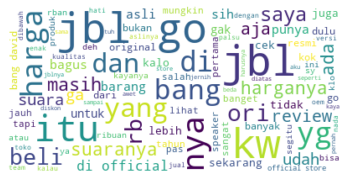

      cluster                                               wiki
35          1  jbl go  nya udah % saya pastikan kw itu om dav...
115         1  speaker jbl terlihat tidak meyakinkan semoga b...
119         1  itu jbl aslinya rb sekarang harga yg ori jbl g...
152         1  bang david and team untuk jbl go  nya sepertin...
169         1  agak keget sih pas denger suara jbl go tapi pa...
...       ...                                                ...
1301        1                                 itu jbl nya kw bro
1322        1                     jbl nya kayak kw bang ngak ims
1341        1                                         jbl kw itu
1348        1                            jbl kw di review kwkwkw
1363        1                                         jbl nyimak

[89 rows x 2 columns]


Cluster: 2
Titles


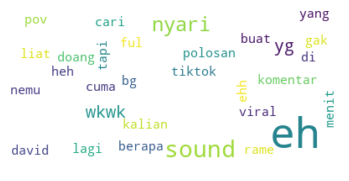

      cluster                                               wiki
1172        2                        eh eh yang kalian cari wkwk
1186        2                          buat yg nyari eh eh doang
1252        2                          sound yg lagi viral eh eh
1280        2                 sound eh eh rame di tiktok bg wkwk
1338        2                                          eh eh ful
1361        2                                        sound eh eh
1376        2                                    nyari "eh eh"? 
1378        2                              cuma liat sound eh eh
1389        2                                              eh eh
1390        2                                             eh ehh
1394        2                                polosan david eh eh
1396        2                                             heh eh
1397        2                                              eh eh
1398        2                                              eh eh
1399        2            

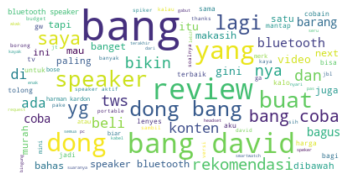

      cluster                                               wiki
16          3  tolong buat konten gini lagi bang  bang david ...
19          3  makasih bang iqbal dan bang kevin akhirnya aku...
44          3  biar semuanya speaker kerehore tetep  speaker ...
49          3  wah kebetulan banget nih saya lagi nyari speak...
52          3  sangat mengkhawatirkan speaker² yg dipuji bang...
...       ...                                                ...
1374        3                                             david 
1375        3                                     tws lagi bang?
1385        3                                    gada vivan bang
1400        3                           bang coba kepalanya diem
1411        3                                           tws dong

[258 rows x 2 columns]


Cluster: 4
Titles


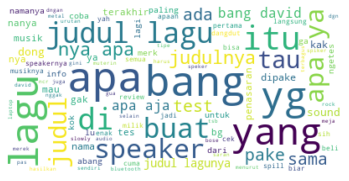

      cluster                                               wiki
86          4  bang saran biar tau sound yg di hasilkan speak...
179         4  mau nanya speker laptop di meja bang david itu...
289         4  jadi urutan yang terbagus apa bang?info sound ...
373         4  yang spiker terakhir yang nggak di review itu ...
394         4  bang lu harus buat lagu sendiri menurut gua bi...
...       ...                                                ...
1249        4                   info lagu nya dong  yg jdag jdug
1290        4  bang judul lagu yang cuma intrumental itu judu...
1325        4                     judul musik untuk tes nya apa?
1388        4                       lu minum apa gag ada kopinya
1406        4                         tetangga apa kabarnya bang

[75 rows x 2 columns]


Cluster: 5
Titles


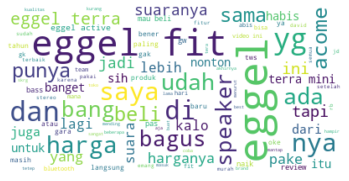

      cluster                                               wiki
1           5  team speaker eggel sudah punya yang eggel fit ...
4           5  this is where local industries start rising pr...
7           5  saya dah pakai eggel fit  langsung beli  pcs s...
10          5  masih setia sama anker soundcore select walau ...
14          5  akhirnya review eggel emang keren si brand lok...
...       ...                                                ...
1009        5                          review eggel terra + donk
1124        5  mau beli palah udah pada abis yg acome a atau ...
1151        5               gara lu eggle fit  naik bang wkwkwkw
1268        5  tp tololx eggel fit itu tdk lengkap tdk ada sl...
1310        5  hehhh daviiddd eggel fit  langsung naik hargan...

[121 rows x 2 columns]


In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
result={'cluster':labels,'wiki':df['text']}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('')
   print('')
   print('Cluster: {}'.format(k))
   print('Titles')
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()
   print(s)
   result
